In [48]:
import pandas as pd
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [50]:
df.shape

(145460, 23)

In [51]:
df.isnull().sum() / df.shape[0] > 0.1

Date             False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation       True
Sunshine          True
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am       True
Pressure3pm       True
Cloud9am          True
Cloud3pm          True
Temp9am          False
Temp3pm          False
RainToday        False
RainTomorrow     False
dtype: bool

In [52]:
drop_cols = ['Sunshine', 'Cloud3pm', 'Cloud9am',
             'Pressure3pm', 'Pressure9am', 'Evaporation']

df.drop(drop_cols, axis=1, inplace=True)

In [53]:
df.dropna(subset=['RainTomorrow'], inplace=True)

In [54]:
df.isnull().sum() / df.shape[0]

Date             0.000000
Location         0.000000
MinTemp          0.004480
MaxTemp          0.002265
Rainfall         0.009888
WindGustDir      0.065615
WindGustSpeed    0.065193
WindDir9am       0.070418
WindDir3pm       0.026570
WindSpeed9am     0.009480
WindSpeed3pm     0.018496
Humidity9am      0.012476
Humidity3pm      0.025388
Temp9am          0.006358
Temp3pm          0.019171
RainToday        0.009888
RainTomorrow     0.000000
dtype: float64

In [55]:
df.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm
count,141556.000000,141871.000000,140787.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,141289.000000,139467.000000
mean,12.186400,23.226784,2.349974,39.984292,14.001988,18.637576,68.843810,51.482606,16.987509,21.687235
std,6.403283,7.117618,8.465173,13.588801,8.893337,8.803345,19.051293,20.797772,6.492838,6.937594
min,-8.500000,-4.800000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,39.000000,13.000000,19.000000,70.000000,52.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,48.000000,19.000000,24.000000,83.000000,66.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,135.000000,130.000000,87.000000,100.000000,100.000000,40.200000,46.700000


In [65]:
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(include=['float', 'int']).columns

In [66]:
for col in cat_cols:
  df[col] = df[col].fillna(df[col].mode()[0])


In [67]:
for col in num_cols:
  df[col] = df[col].fillna(df[col].mean())


In [68]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [69]:
df.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.186400,23.226784,2.349974,39.984292,14.001988,18.637576,68.843810,51.482606,16.987509,21.687235
std,6.388924,7.109554,8.423217,13.138385,8.851082,8.721551,18.932077,20.532065,6.472166,6.870771
min,-8.500000,-4.800000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,12.300000,16.700000
50%,12.000000,22.700000,0.000000,39.000000,13.000000,18.637576,70.000000,51.482606,16.800000,21.300000
75%,16.800000,28.200000,0.800000,46.000000,19.000000,24.000000,83.000000,65.000000,21.500000,26.300000
max,33.900000,48.100000,371.000000,135.000000,130.000000,87.000000,100.000000,100.000000,40.200000,46.700000


In [70]:
df['Date'] = pd.to_datetime(df['Date'])

In [71]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [73]:
df.drop(['Date'], axis=1, inplace=True)

In [74]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,17.8,29.7,No,No,2008,12,5


In [ ]:
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
  print(df[col].value_counts())

In [91]:
X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

dic = {'No':0, 'Yes':1}
y = y.map(dic)

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [93]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
cat_cols = X_train.select_dtypes(include='object').columns
oe = OrdinalEncoder()
X_train[cat_cols] = oe.fit_transform(X_train[cat_cols])
X_test[cat_cols] = oe.transform(X_test[cat_cols])

In [94]:
st = StandardScaler()
X_train = st.fit_transform(X_train)
X_test = st.transform(X_test)

In [104]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [108]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score
import seaborn as sns
def Classification_results(y_true, y_pred):
    # Making the Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    Auc = roc_auc_score(y_true, y_pred)
    report = classification_report(y_true, y_pred)

    print(f'Confusion Matrix: \n{cm}')
    print(f'accuracy_score: {acc}')
    print(f'roc_auc_score: {Auc}')
    print(f'report: \n{report}')
    sns.heatmap(cm, annot=True)

In [109]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

Confusion Matrix: 
[[83582  4636]
 [13931 11605]]
accuracy_score: 0.8367793660003164
roc_auc_score: 0.7009524100902974
report: 
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     88218
           1       0.71      0.45      0.56     25536

    accuracy                           0.84    113754
   macro avg       0.79      0.70      0.73    113754
weighted avg       0.83      0.84      0.82    113754



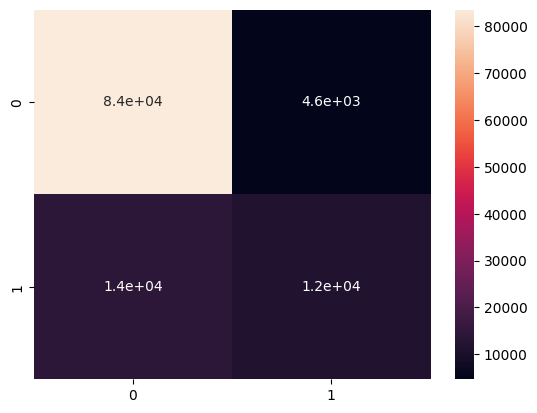

In [110]:
Classification_results(y_train, y_train_pred)

Confusion Matrix: 
[[20882  1216]
 [ 3475  2866]]
accuracy_score: 0.8350504588768944
roc_auc_score: 0.6984757893930336
report: 
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     22098
           1       0.70      0.45      0.55      6341

    accuracy                           0.84     28439
   macro avg       0.78      0.70      0.72     28439
weighted avg       0.82      0.84      0.82     28439



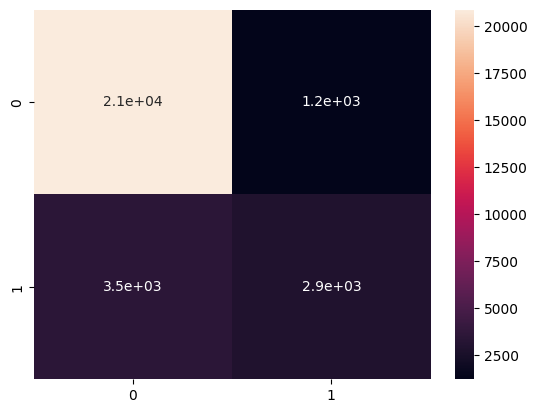

In [111]:
Classification_results(y_test, y_test_pred)

In [119]:
newdata = X.iloc[0:1, :]
newdata

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,16.9,21.8,No,2008,12,1


In [ ]:
newdata[cat_cols] = oe.transform(newdata[cat_cols])

In [121]:
newdata = st.transform(newdata)

In [124]:
model.predict(newdata)

array([0])